In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer

## Parameters

In [2]:
nr_particles = 10**0
nr_steps = 1*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1.0 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]
observer_substeps = np.array([True, True, True]) #np.array([True, True, True])
mean_free_path = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12])  # [m]
observer_spheres = np.array([-1.0]) # np.array([1.0*10**16, 1.0*10**17, 1.0*10**18, 1.0*10**19, 1.0*10**20]) # np.array([-1.0]) is just a time evolution observer

## Simulation setup

In [3]:
sim = Simulation()

source = Source(gyro_radius, mean_free_path, source_pos, nr_particles)
sim.add_source(source)

observer = Observer(observer_substeps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source
observer
CPU times: user 1.78 s, sys: 5.93 ms, total: 1.79 s
Wall time: 1.79 s


## Analyze trajectories

init trajectory plotting class


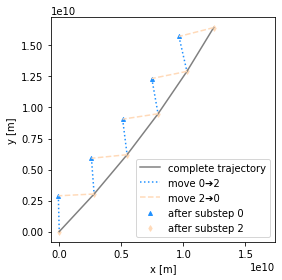

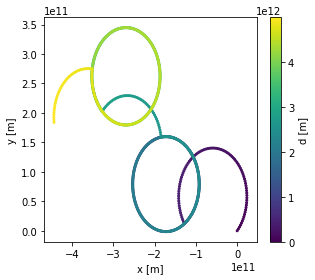

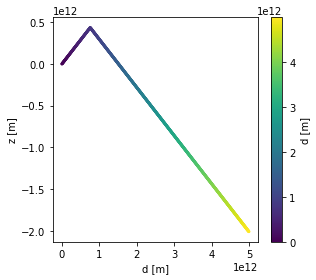

In [4]:
from plot.Trajectory import Trajectory

df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
tra = Trajectory(df_time_evolution_observer, dimensions)
particle_ids = tra.get_particle_ids()
tra.plot_trjectory_substeps(0, 2, particle_ids[0], 16, None)
tra.plot_trajectory('x', 'y', 'd', particle_ids[:], -1, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[:], -1, None)

In [8]:
df_ids = df[df['id'] == 0]
df_ids

,id,i,d,x,y,z,radius,step
0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.0,NaN
1,0.0,2.0,6.666666e+09,2.594650e+09,5.908776e+09,2.886751e+09,-1.0,0.0
2,0.0,2.0,8.333333e+09,5.466976e+09,6.197000e+09,2.886751e+09,-1.0,1.0
3,0.0,2.0,1.000000e+10,5.466976e+09,6.197000e+09,5.773502e+09,-1.0,2.0
4,0.0,10.0,4.666667e+10,1.789440e+10,3.405724e+10,2.598076e+10,-1.0,0.0
...,...,...,...,...,...,...,...,...
2996,0.0,9980.0,4.988852e+13,-4.407934e+11,-9.423448e+11,4.996934e+12,-1.0,1.0
2997,0.0,9980.0,4.989018e+13,-4.407934e+11,-9.423448e+11,4.999821e+12,-1.0,2.0
2998,0.0,9990.0,4.993681e+13,-4.433406e+11,-9.807323e+11,5.025802e+12,-1.0,0.0
2999,0.0,9990.0,4.993847e+13,-4.459794e+11,-9.819029e+11,5.025802e+12,-1.0,1.0
